In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
df = pd.read_csv("Netflix Dataset.csv")

# Quick look at dataset
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [4]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


df['Year'] = df['Release_Date'].dt.year


df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

In [5]:
# Top Countries
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))


Top 5 Countries:
 United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: Country, dtype: int64


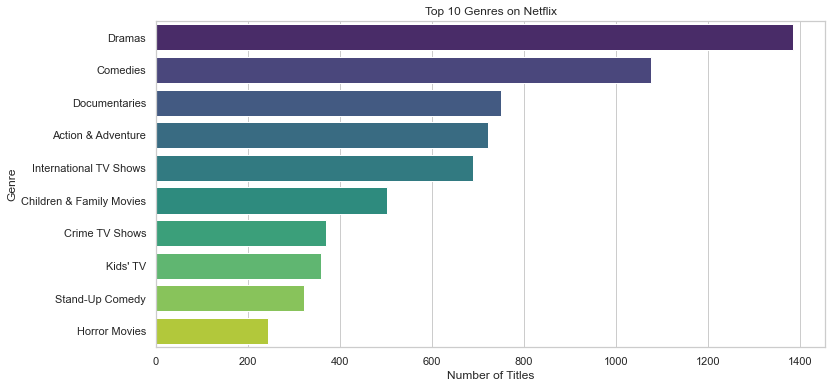

In [6]:
# 1. Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

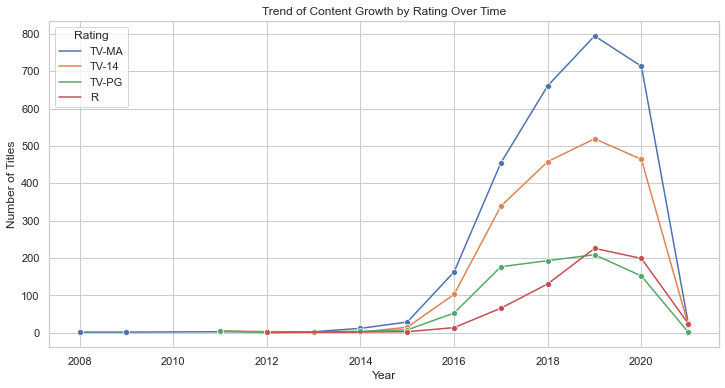

In [7]:
# 2. Trend Line – Growth of Content Type by Rating Over Time
popular_ratings = df['Rating'].value_counts().head(4).index
rating_trends = df[df['Rating'].isin(popular_ratings)].groupby(['Year','Rating']).size().reset_index(name='Count')

sns.lineplot(data=rating_trends, x='Year', y='Count', hue='Rating', marker="o")
plt.title("Trend of Content Growth by Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Rating")
plt.show()

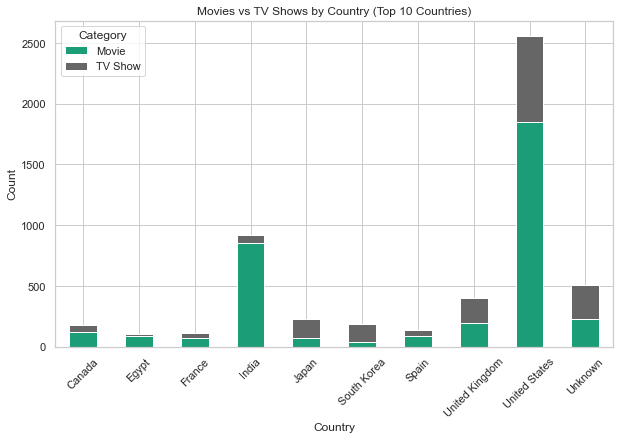

In [8]:
# 3. Simple Stacked Bar Chart – Movies vs TV Shows (Top 10 Countries) with different colors
df[df['Country'].isin(df['Country'].value_counts().head(10).index)] \
    .groupby(['Country','Category']).size().unstack(fill_value=0) \
    .plot(kind='bar', stacked=True, figsize=(10,6), colormap="Dark2")

plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


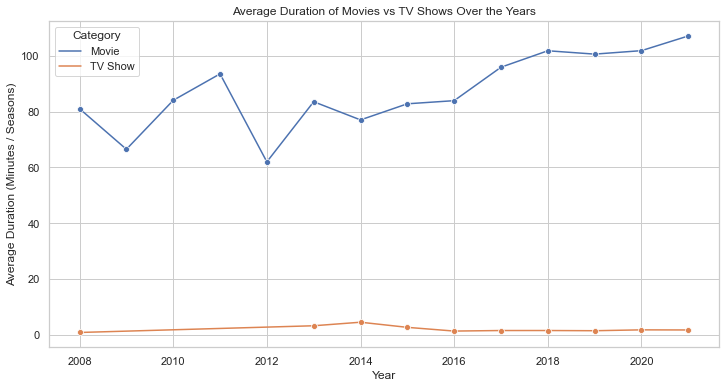

In [9]:
# 4. Line Chart – Average Duration of Movies vs TV Shows Over the Years
df['Duration_Num'] = df['Duration'].str.extract('(\d+)').astype(float)  # Extract numeric duration
avg_duration_trend = df.groupby(['Year', 'Category'])['Duration_Num'].mean().reset_index()

sns.lineplot(data=avg_duration_trend, x='Year', y='Duration_Num', hue='Category', marker='o')
plt.title("Average Duration of Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Duration (Minutes / Seasons)")
plt.show()


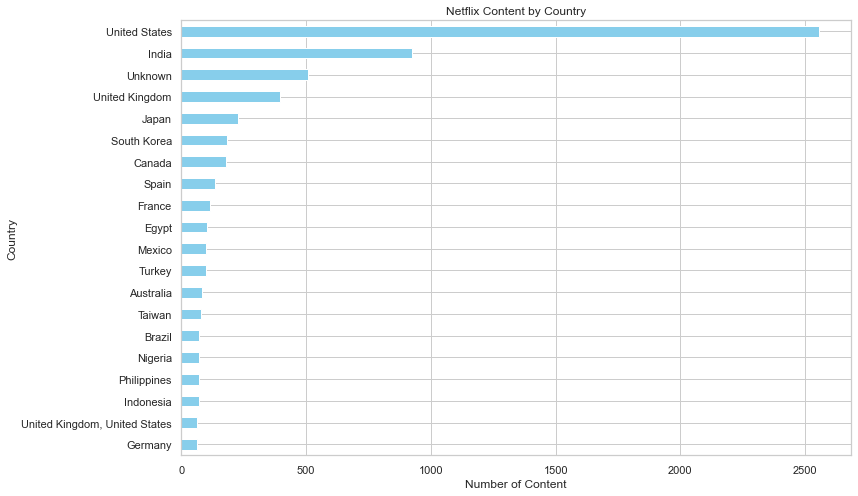

In [11]:
top_countries = df['Country'].value_counts().head(20)  # top 20 countries
top_countries.plot(kind='barh', figsize=(12,8), color='skyblue')
plt.xlabel("Number of Content")
plt.ylabel("Country")
plt.title("Netflix Content by Country")
plt.gca().invert_yaxis()  # largest on top
plt.show()
